# Importing necessary libraries

In [20]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection from API

In [21]:
#Fetching 10 stocks and 9 commodities data
stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
    "ABT",    # Abbott Laboratories
    "IBM",    # International Business Machines Corporation
    "ORCL",   # Oracle Corporation
    "INTC",   # Intel Corporation
    "MO",     # Altria Group, Inc.
    "NVS",    # Novartis AG
    "PFE",    # Pfizer Inc.
    "TMUS",   # T-Mobile US, Inc.
    "KO",     # The Coca-Cola Company
    "XOM"     # Exxon Mobil Corporation
]


def fetch_and_save(stock_symbol):
    # Fetching data from yahoo finance
    data = yf.download(stock_symbol, start="2010-01-01", end="2023-01-01")
    print(data)
    columns_to_save = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    
    data.to_csv(f"C:/Users/kship/Documents/IB/predictions/data/{stock_symbol}.csv", columns=columns_to_save)

for stock in stocks:
    fetch_and_save(stock)

print("Stock data with volatility and lagged close prices has been fetched and saved!")

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2010-01-04  79.629997  81.680000  79.629997  81.510002  81.510002  263542
2010-01-05  81.629997  82.000000  80.949997  81.769997  81.769997  258887
2010-01-06  81.430000  83.519997  80.849998  83.180000  83.180000  370059
2010-01-07  83.199997  83.360001  82.260002  82.660004  82.660004  246632
2010-01-08  82.650002  83.470001  81.800003  82.750000  82.750000  310377
...               ...        ...        ...        ...        ...     ...
2022-12-23  78.180000  80.330002  77.980003  79.559998  79.559998  237711
2022-12-27  79.900002  81.180000  79.160004  79.529999  79.529999  199601
2022-12-28  79.889999  79.919998  77.300003  78.959999  78.959999  207717
2022-12-29  78.820000  78.820000  76.790001  78.400002  78.400002  199858
2022-12-30  78.730003  80.669998  77.709999

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   26.000362   26.177889   25.870815   26.129908   19.244104   
2010-01-05   26.134706   26.134706   25.789249   25.918797   19.088629   
2010-01-06   25.880411   26.096321   25.837231   26.062737   19.194643   
2010-01-07   26.057938   26.283443   25.942785   26.278646   19.353643   
2010-01-08   26.273848   26.508949   26.235464   26.412991   19.452585   
...                ...         ...         ...         ...         ...   
2022-12-23  107.669998  108.400002  107.099998  108.180000  106.645416   
2022-12-27  108.349998  109.050003  107.379997  108.570000  107.029877   
2022-12-28  109.019997  110.099998  107.739998  107.830002  106.300377   
2022-12-29  108.750000  110.760002  108.459999  110.309998  108.745193   
2022-12-30  109.800003  110.120003  108.660

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-01-04  28.580000  28.610001  28.450001  28.520000  18.793236  13870400
2010-01-05  28.424999  28.495001  28.070000  28.174999  18.565901  23172400
2010-01-06  28.174999  28.219999  27.990000  28.165001  18.559313  19264600
2010-01-07  28.165001  28.184999  27.875000  28.094999  18.513178  13234600
2010-01-08  27.730000  27.820000  27.375000  27.575001  18.170530  28712400
...               ...        ...        ...        ...        ...       ...
2022-12-23  63.500000  63.869999  63.200001  63.820000  62.855495   6463300
2022-12-27  63.930000  64.290001  63.709999  64.209999  63.239597   7320700
2022-12-28  64.459999  64.650002  63.490002  63.570000  62.609272   7159400
2022-12-29  63.799999  64.150002  63.700001  63.950001  62.983528   7169300
2022-12-30  63.9199

# Data Preprocessing

In [22]:
stocks = [
    "CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
    'ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM'

]
# Create a dictionary to store dataframes
dataframes = {}

# Read and store dataframes with 'Date' as the index
for stock in stocks:
    df = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/data/{stock}.csv", parse_dates=['Date'], index_col='Date')
    dataframes[stock] = df

# Concatenate dataframes along the columns axis to find missing dates across stocks
combined_df = pd.concat(dataframes, axis=1)


In [23]:
combined_df

CL=F                                                  BZ=F  \
                 Open       High        Low      Close    Volume       Open   
Date                                                                          
2010-01-04  79.629997  81.680000  79.629997  81.510002  263542.0  80.120003   
2010-01-05  81.629997  82.000000  80.949997  81.769997  258887.0  80.589996   
2010-01-06  81.430000  83.519997  80.849998  83.180000  370059.0  81.129997   
2010-01-07  83.199997  83.360001  82.260002  82.660004  246632.0  81.510002   
2010-01-08  82.650002  83.470001  81.800003  82.750000  310377.0  81.370003   
...               ...        ...        ...        ...       ...        ...   
2022-12-23  78.180000  80.330002  77.980003  79.559998  237711.0  81.730003   
2022-12-27  79.900002  81.180000  79.160004  79.529999  199601.0  84.459999   
2022-12-28  79.889999  79.919998  77.300003  78.959999  207717.0  84.599998   
2022-12-29  78.820000  78.820000  76.790001  78.400002  199858.0  82.860001   
2022-12-30  78.730003  80.669998  77.709999  80.260002  205909.0  83.660004   

                                                      ...         KO  \
                 High        Low      Close   Volume  ...       Open   
Date                                                  ...              
2010-01-04  79.820000  80.120003  80.120003     97.0  ...  28.580000   
2010-01-05  80.260002  80.589996  80.589996     97.0  ...  28.424999   
2010-01-06  81.699997  80.129997  81.889999      7.0  ...  28.174999   
2010-01-07  81.510002  81.629997  81.510002      7.0  ...  28.165001   
2010-01-08  81.529999  81.089996  81.370003      7.0  ...  27.730000   
...               ...        ...        ...      ...  ...        ...   
2022-12-23  84.370003  81.339996  83.919998   8621.0  ...  63.500000   
2022-12-27  85.669998  83.660004  84.330002   7512.0  ...  63.930000   
2022-12-28  84.639999  81.949997  83.260002   5384.0  ...  64.459999   
2022-12-29  82.910004  81.300003  82.260002  20599.0  ...  63.799999   
2022-12-30  86.279999  82.879997  85.910004  19375.0  ...  63.919998   

                                                              XOM              \
                 High        Low      Close    Volume        Open        High   
Date                                                                            
2010-01-04  28.610001  28.450001  28.520000  13870400   68.720001   69.260002   
2010-01-05  28.495001  28.070000  28.174999  23172400   69.190002   69.449997   
2010-01-06  28.219999  27.990000  28.165001  19264600   69.449997   70.599998   
2010-01-07  28.184999  27.875000  28.094999  13234600   69.900002   70.059998   
2010-01-08  27.820000  27.375000  27.575001  28712400   69.690002   69.750000   
...               ...        ...        ...       ...         ...         ...   
2022-12-23  63.869999  63.200001  63.820000   6463300  106.949997  108.739998   
2022-12-27  64.290001  63.709999  64.209999   7320700  109.269997  110.470001   
2022-12-28  64.650002  63.490002  63.570000   7159400  109.910004  110.000000   
2022-12-29  64.150002  63.700001  63.950001   7169300  107.989998  109.720001   
2022-12-30  63.919998  63.169998  63.610001   7650200  108.610001  110.500000   

                                              
                   Low       Close    Volume  
Date                                          
2010-01-04   68.190002   69.150002  27809100  
2010-01-05   68.800003   69.419998  30174700  
2010-01-06   69.339996   70.019997  35044700  
2010-01-07   69.419998   69.800003  27192100  
2010-01-08   69.220001   69.519997  24891800  
...                ...         ...       ...  
2022-12-23  106.900002  108.680000  11539400  
2022-12-27  108.830002  110.190002  11962100  
2022-12-28  107.900002  108.379997  10702100  
2022-12-29  107.989998  109.199997  10534000  
2022-12-30  108.610001  110.300003  11799600  

[3272 rows x 95 columns]

In [24]:
missing_count = combined_df.isnull().sum()

# Group by the top-level columns (stocks) to sum the missing values for Open, High, Low, Close, Volume
grouped_missing_count = missing_count.groupby(level=0).sum()

# Find the total number of rows
total_rows = len(combined_df)

# Calculate the percentage of missing values for each stock
missing_percentage_per_stock = (grouped_missing_count / (total_rows * 5)) * 100  

### Missing value percentage plot 

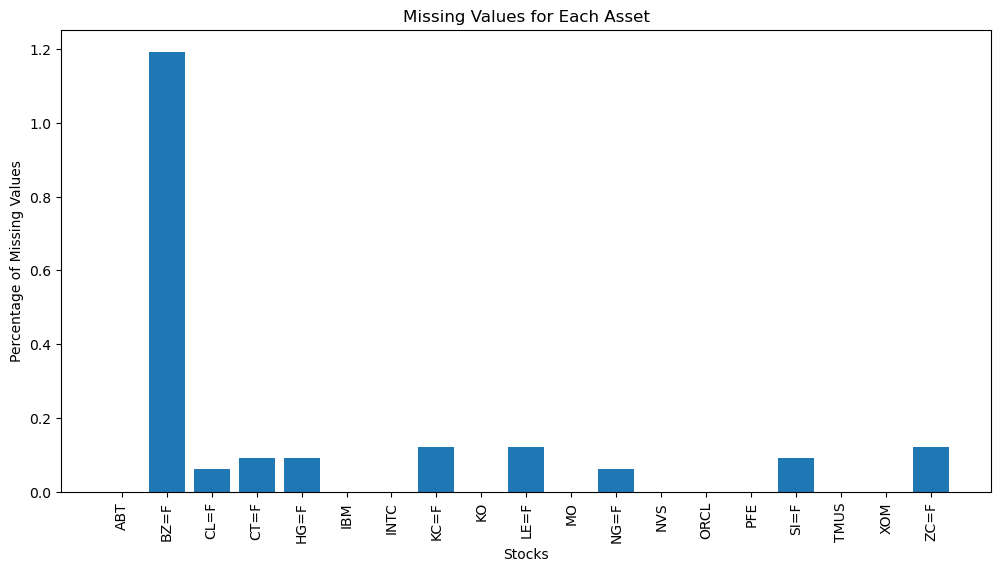

In [25]:
plt.figure(figsize=(12, 6))  

# Plotting the bar chart for missing values percentage
plt.bar(missing_percentage_per_stock.index, missing_percentage_per_stock.values)


plt.xlabel('Stocks')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values for Each Asset')

plt.xticks(rotation=90)

plt.show()

In [26]:
combined_df.describe()

CL=F                                                       \
              Open         High          Low        Close        Volume   
count  3270.000000  3270.000000  3270.000000  3270.000000  3.270000e+03   
mean     71.300979    72.348771    70.149125    71.279988  4.155935e+05   
std      22.706232    22.831463    22.566427    22.743682  2.112483e+05   
min     -14.000000    13.690000   -40.320000   -37.630001  4.851600e+04   
25%      51.645000    52.490000    50.700001    51.567501  2.648282e+05   
50%      70.064999    71.239998    69.135002    70.169998  3.622025e+05   
75%      92.307499    93.430002    91.097498    92.325001  5.446095e+05   
max     124.660004   130.500000   120.790001   123.699997  2.288230e+06   

              BZ=F                                                       ...  \
              Open         High          Low        Close        Volume  ...   
count  3233.000000  3233.000000  3233.000000  3233.000000   3233.000000  ...   
mean     77.669685    78.586075    76.710272    77.680399  19411.555521  ...   
std      25.729415    25.810976    25.639805    25.754815  16261.203512  ...   
min      19.559999    21.270000    16.000000    19.330000      0.000000  ...   
25%      56.070000    56.779999    55.360001    56.000000   2082.000000  ...   
50%      74.250000    74.959999    73.129997    74.099998  20163.000000  ...   
75%     105.430000   106.430000   103.970001   105.260002  31417.000000  ...   
max     129.570007   137.000000   125.300003   127.980003  87185.000000  ...   

                KO                                                       \
              Open         High          Low        Close        Volume   
count  3272.000000  3272.000000  3272.000000  3272.000000  3.272000e+03   
mean     43.860524    44.153762    43.561964    43.864995  1.516091e+07   
std       8.836552     8.917754     8.754691     8.837265  6.725716e+06   
min      25.110001    25.150000    24.735001    25.014999  2.996300e+06   
25%      38.560001    38.754999    38.279999    38.520000  1.084798e+07   
50%      42.730000    43.065001    42.440001    42.730000  1.365555e+07   
75%      48.784999    49.310001    48.529999    48.882499  1.762438e+07   
max      67.000000    67.199997    65.720001    66.209999  9.896750e+07   

               XOM                                                       
              Open         High          Low        Close        Volume  
count  3272.000000  3272.000000  3272.000000  3272.000000  3.272000e+03  
mean     78.247928    78.902961    77.585153    78.268032  1.758747e+07  
std      15.245848    15.263689    15.248758    15.279077  9.644271e+06  
min      31.410000    32.380001    30.110001    31.450001  3.851300e+06  
25%      70.097498    70.617502    69.414999    70.277498  1.082928e+07  
50%      81.720001    82.290001    81.155003    81.790001  1.490560e+07  
75%      87.922499    88.502501    87.279999    87.949997  2.141418e+07  
max     113.879997   114.660004   113.059998   114.180000  1.180235e+08  

[8 rows x 95 columns]

### Heatmap of missing values 

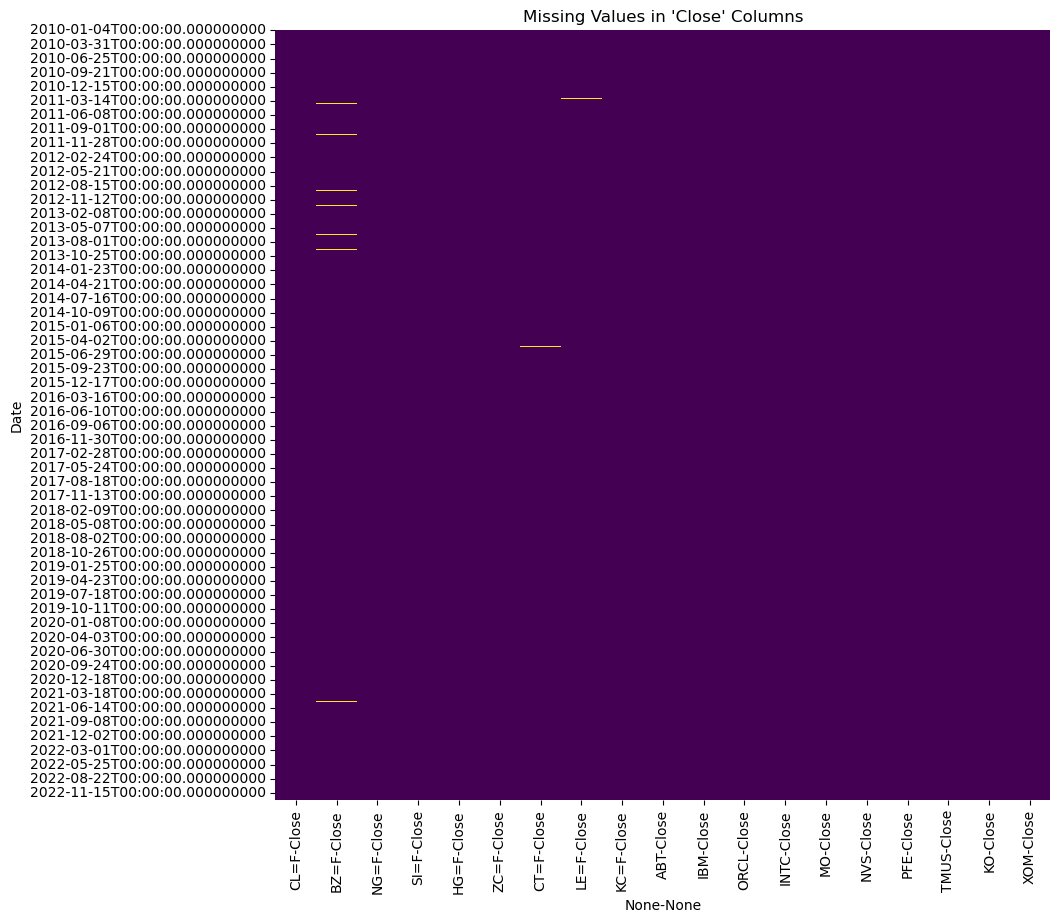

In [27]:

close_columns = pd.Index([col for col in combined_df.columns if col[1] == 'Close'])
df_close = combined_df[close_columns]

df_missing = df_close.isnull().astype(int)

plt.figure(figsize=(10, 10))
sns.heatmap(df_missing, cbar=False, cmap='viridis')
plt.title("Missing Values in 'Close' Columns")
plt.show()

In [28]:
final_df=combined_df.ffill()
final_df.isnull().sum()

CL=F  Open      0
      High      0
      Low       0
      Close     0
      Volume    0
               ..
XOM   Open      0
      High      0
      Low       0
      Close     0
      Volume    0
Length: 95, dtype: int64

In [29]:

# List of unique assets
assets = final_df.columns.levels[0]

# Loop through each asset and save the corresponding data to a CSV file
for asset in assets:
    # Select columns for the current asset
    asset_df = final_df[asset]
    print(asset_df)
    
    #saving CSV with no missing values
    asset_df.to_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{asset}.csv")


                 Open       High        Low      Close    Volume
Date                                                            
2010-01-04  79.629997  81.680000  79.629997  81.510002  263542.0
2010-01-05  81.629997  82.000000  80.949997  81.769997  258887.0
2010-01-06  81.430000  83.519997  80.849998  83.180000  370059.0
2010-01-07  83.199997  83.360001  82.260002  82.660004  246632.0
2010-01-08  82.650002  83.470001  81.800003  82.750000  310377.0
...               ...        ...        ...        ...       ...
2022-12-23  78.180000  80.330002  77.980003  79.559998  237711.0
2022-12-27  79.900002  81.180000  79.160004  79.529999  199601.0
2022-12-28  79.889999  79.919998  77.300003  78.959999  207717.0
2022-12-29  78.820000  78.820000  76.790001  78.400002  199858.0
2022-12-30  78.730003  80.669998  77.709999  80.260002  205909.0

[3272 rows x 5 columns]
                 Open       High        Low      Close   Volume
Date                                                           
20

                  Open        High         Low       Close   Volume
Date                                                               
2010-01-04  125.411087  127.122368  125.095604  126.625237  6438444
2010-01-05  125.889099  126.051628  124.378586  125.095604  7156104
2010-01-06  124.933075  125.707458  124.101341  124.282982  5863144
2010-01-07  124.158699  124.521988  123.240921  123.852776  6109268
2010-01-08  123.393883  125.162521  123.374763  125.095604  4390271
...                ...         ...         ...         ...      ...
2022-12-23  140.589996  141.860001  139.600006  141.649994  2092500
2022-12-27  141.729996  142.720001  141.229996  142.419998  2742400
2022-12-28  142.399994  142.809998  139.949997  140.020004  2539500
2022-12-29  140.580002  142.259995  140.449997  141.059998  2337200
2022-12-30  140.539993  140.899994  139.449997  140.889999  2858000

[3272 rows x 5 columns]
                 Open       High        Low      Close    Volume
Date                      

In [30]:
# plt.rcParams['font.size'] = 14

# # Or set font size just for Seaborn
# sns.set(font_scale=1.2)

# Data Analysis

### Correlation matrix of features 

CL=F


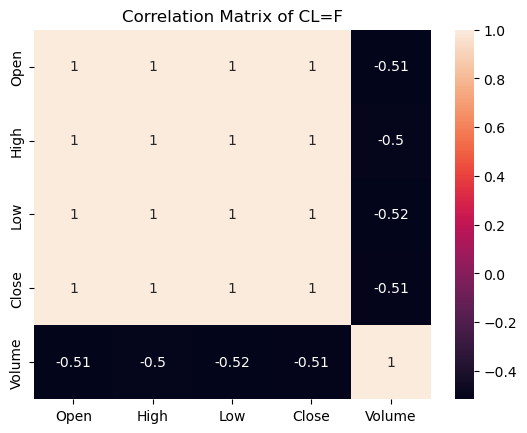

KC=F


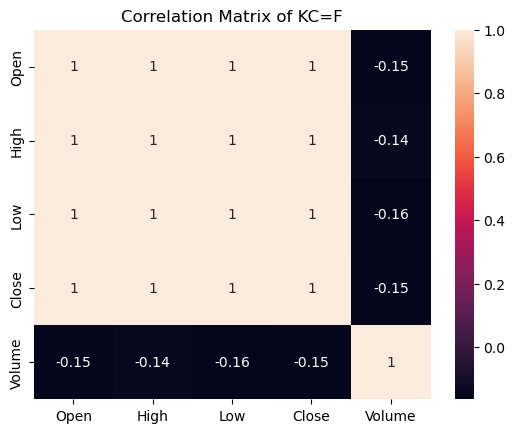

INTC


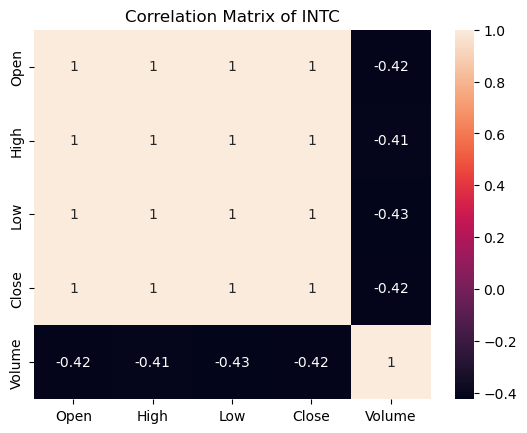

PFE


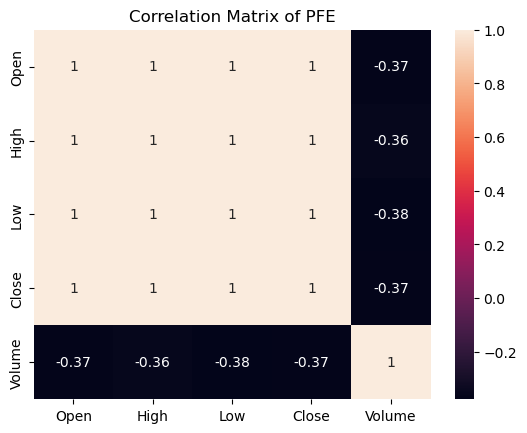

In [31]:

stock_symbols = [
    "CL=F",   
    "KC=F",   
    'INTC',
    'PFE']

for stock in stock_symbols:
    print(stock)
    df = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/data/{stock}.csv")
    sns.heatmap(df.corr(), annot=True)
    plt.title(f'Correlation Matrix of {stock}')
    plt.show()

In [51]:
#concatenating data of two stocks and two commodities for further analysis
df_list=[]
for stock in stock_symbols:
    print(stock)
    data=pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/data/{stock}.csv")

    # Add a 'Symbol' column with the stock symbol
    data['Symbol'] = stock

    # Append this dataframe to the list
    df_list.append(data)

# Concatenate all dataframes in the list into one dataframe
df = pd.concat(df_list, ignore_index=True)
if 'Date' in df.columns:
    df.sort_values(by=['Symbol', 'Date'], inplace=True)


CL=F
KC=F
INTC
PFE


In [52]:
df

,Date,Open,High,Low,Close,Volume,Symbol
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,263542,CL=F
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,258887,CL=F
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,370059,CL=F
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,246632,CL=F
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,310377,CL=F
...,...,...,...,...,...,...,...
13077,2022-12-23,51.560001,51.950001,51.240002,51.830002,10666500,PFE
13078,2022-12-27,51.860001,51.930000,51.049999,51.130001,12033800,PFE
13079,2022-12-28,51.049999,51.389999,50.750000,50.799999,10053900,PFE
13080,2022-12-29,51.020000,51.669998,50.990002,51.330002,8971300,PFE


### Analyzing Close prices 

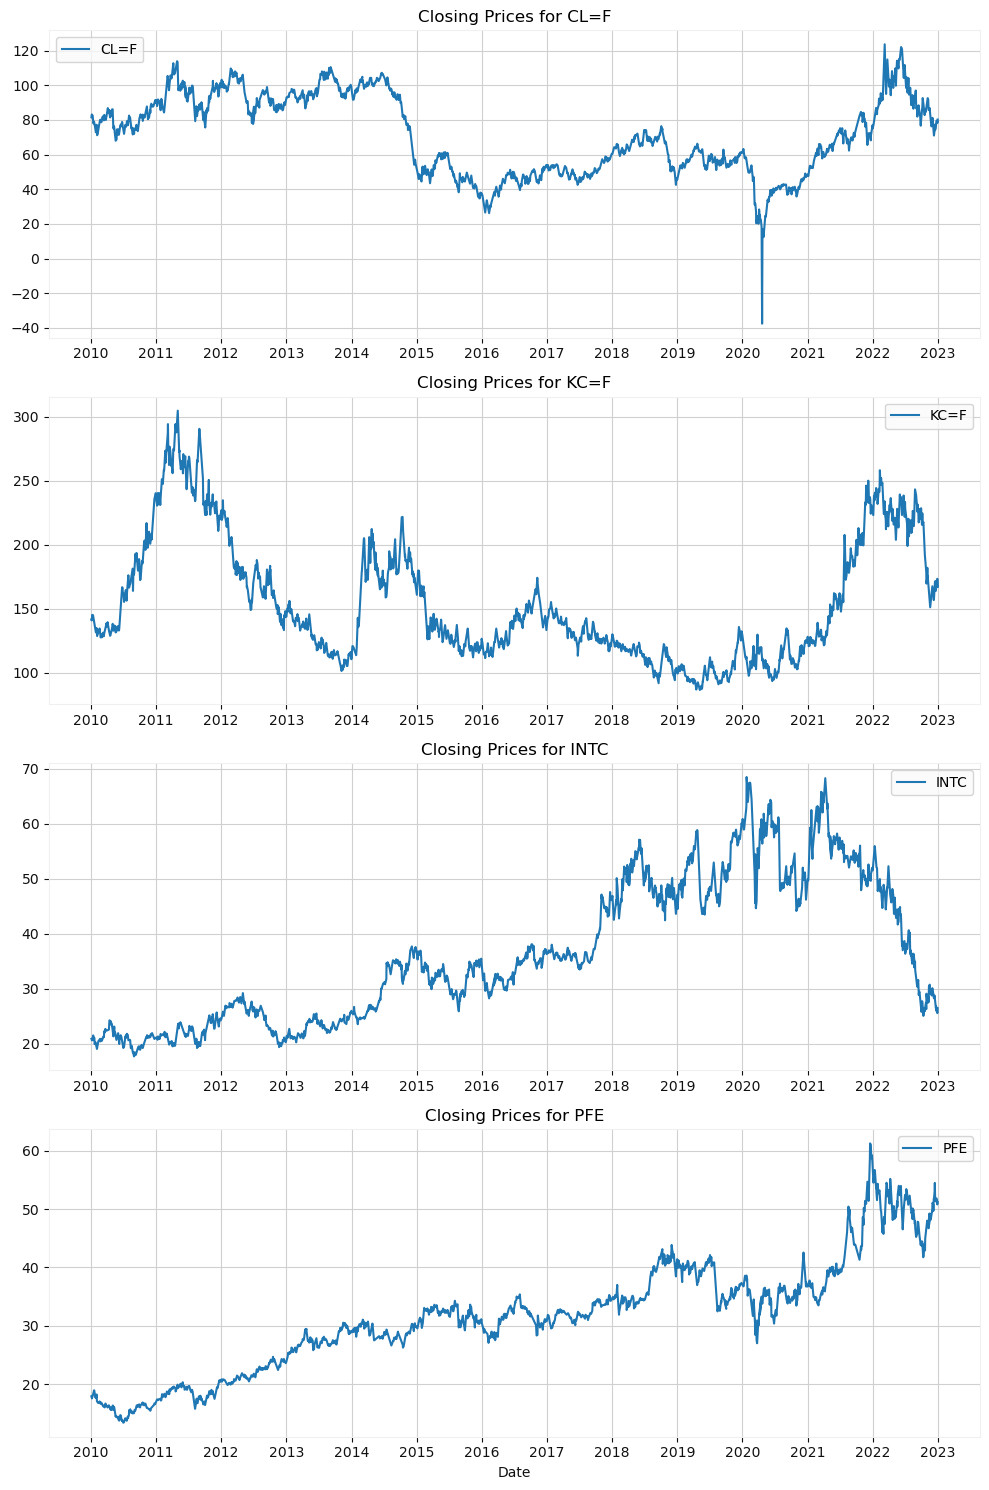

In [53]:
import matplotlib.dates as mdates
df['Date'] = pd.to_datetime(df['Date'])


fig, axs = plt.subplots(len(stock_symbols), 1, figsize=(10, 15))

for idx, symbol in enumerate(stock_symbols):
    subset = df[df['Symbol'] == symbol]
    axs[idx].plot(subset['Date'], subset['Close'], label=symbol)
    axs[idx].set_title(f'Closing Prices for {symbol}')
    axs[idx].legend()
    
    # Setting x-axis to display years
    axs[idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[idx].set_facecolor('white')
    plt.grid()
plt.xlabel('Date')
plt.tight_layout()
plt.show()

### Volume over Time

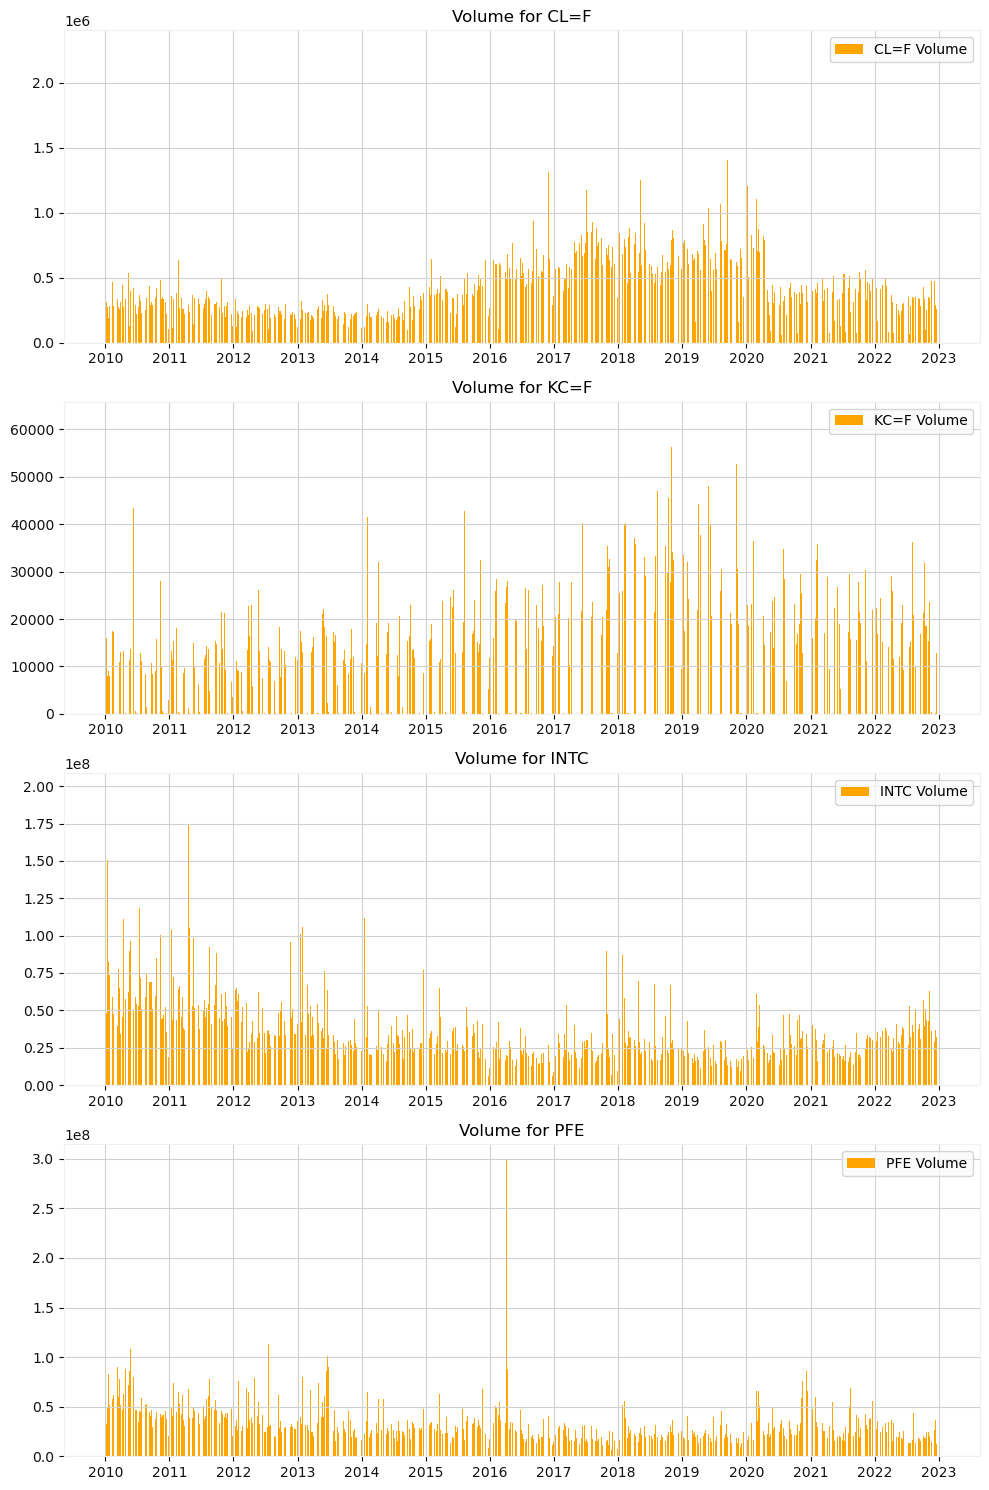

In [54]:
stock_symbols = [
    "CL=F",   
    "KC=F",   
    'INTC',
    'PFE']



fig, axs = plt.subplots(len(stock_symbols), 1, figsize=(10, 15))

for idx, symbol in enumerate(stock_symbols):
    subset = df[df['Symbol'] == symbol]
    axs[idx].bar(subset['Date'], subset['Volume'], label=f"{symbol} Volume",color='orange')
    axs[idx].set_title(f'Volume for {symbol}')
    axs[idx].legend()
    
    # Setting x-axis to display years
    axs[idx].xaxis.set_major_locator(mdates.YearLocator())
    axs[idx].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axs[idx].set_facecolor('white')
    plt.grid()
plt.tight_layout()
plt.show()

### Candlestick Chart 

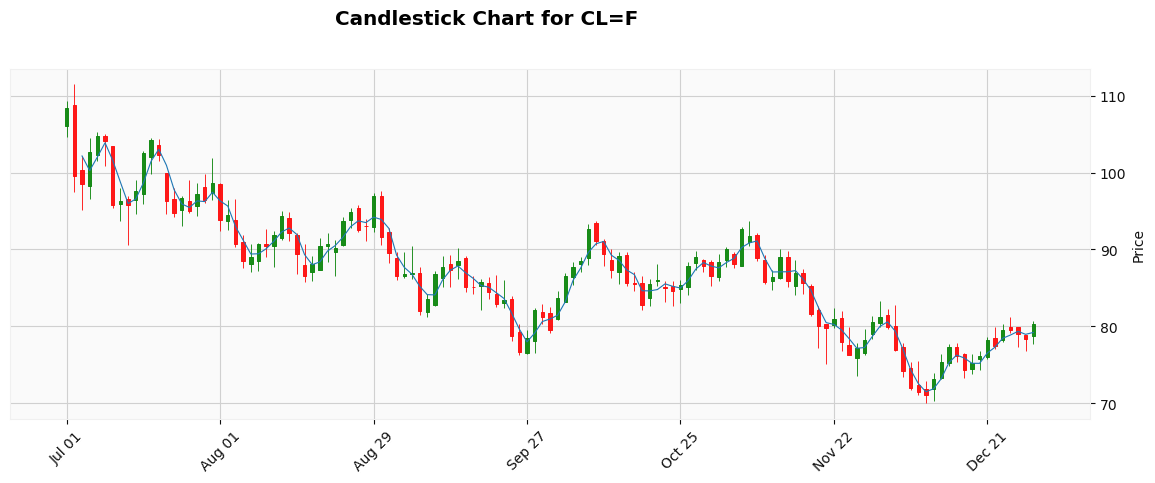

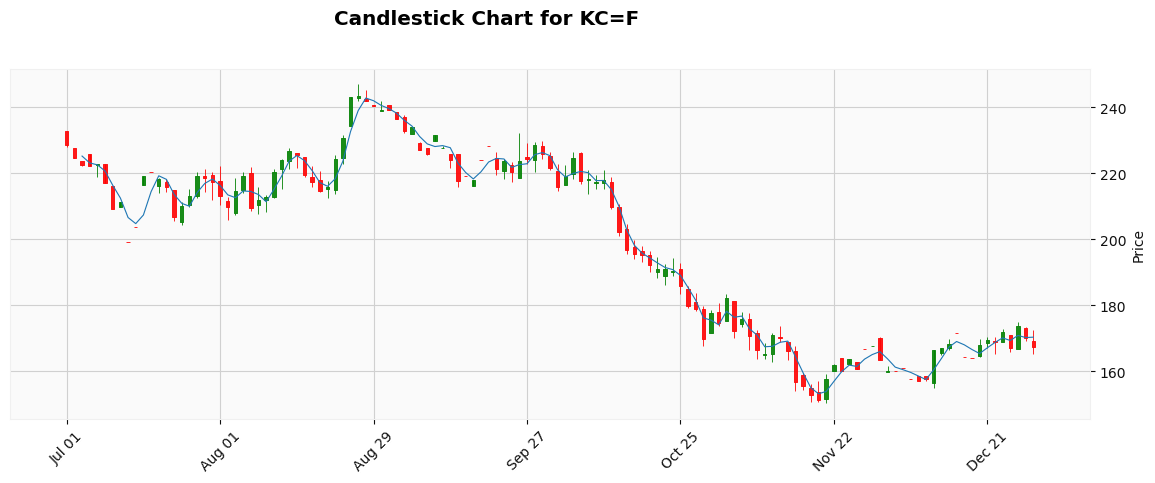

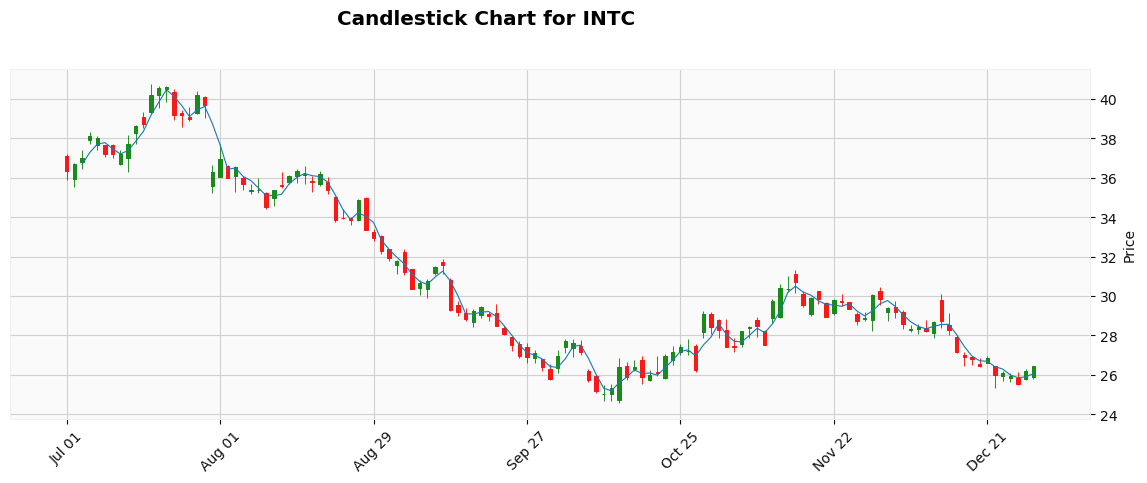

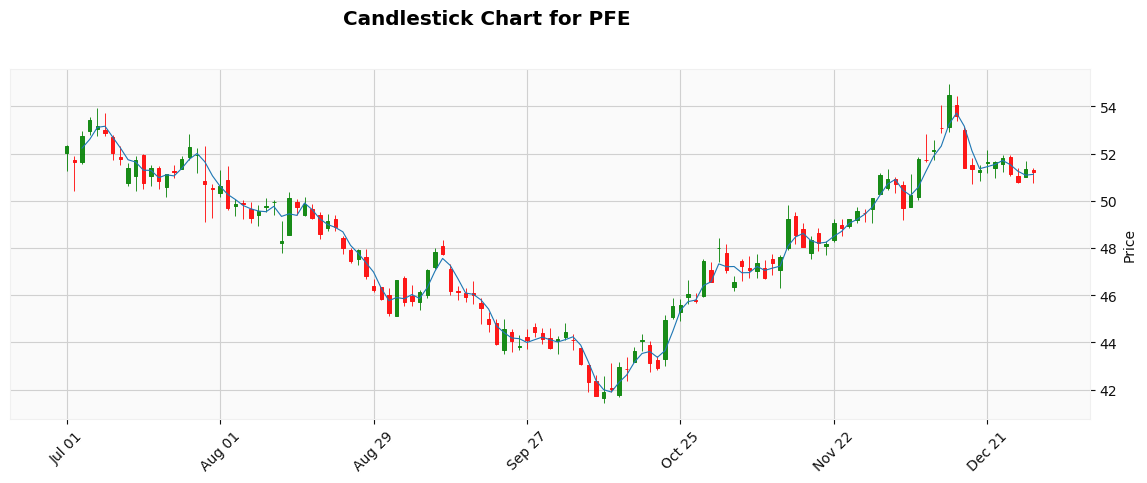

In [56]:
import mplfinance as mpf
df = df.set_index('Date')

# Filter the DataFrame from a short time frame for better visualization
start_date = '2022-07-01'
end_date = '2023-01-01'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

mc = mpf.make_marketcolors(
    up='green',  # Color for days when closing > opening price
    down='red',  # Color for days when closing < opening price
    inherit=True
)

s = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc) 

for symbol in stock_symbols:
    subset = filtered_df[filtered_df['Symbol'] == symbol].copy()
    subset = subset[['Open', 'High', 'Low', 'Close', 'Volume']]  
    
    # Ensure the index is a DatetimeIndex
    subset.index = pd.to_datetime(subset.index)
    
    mpf.plot(subset, type='candle', title=f'Candlestick Chart for {symbol} ', mav=(3), style=s ,figsize=(15,5))

### Moving Average

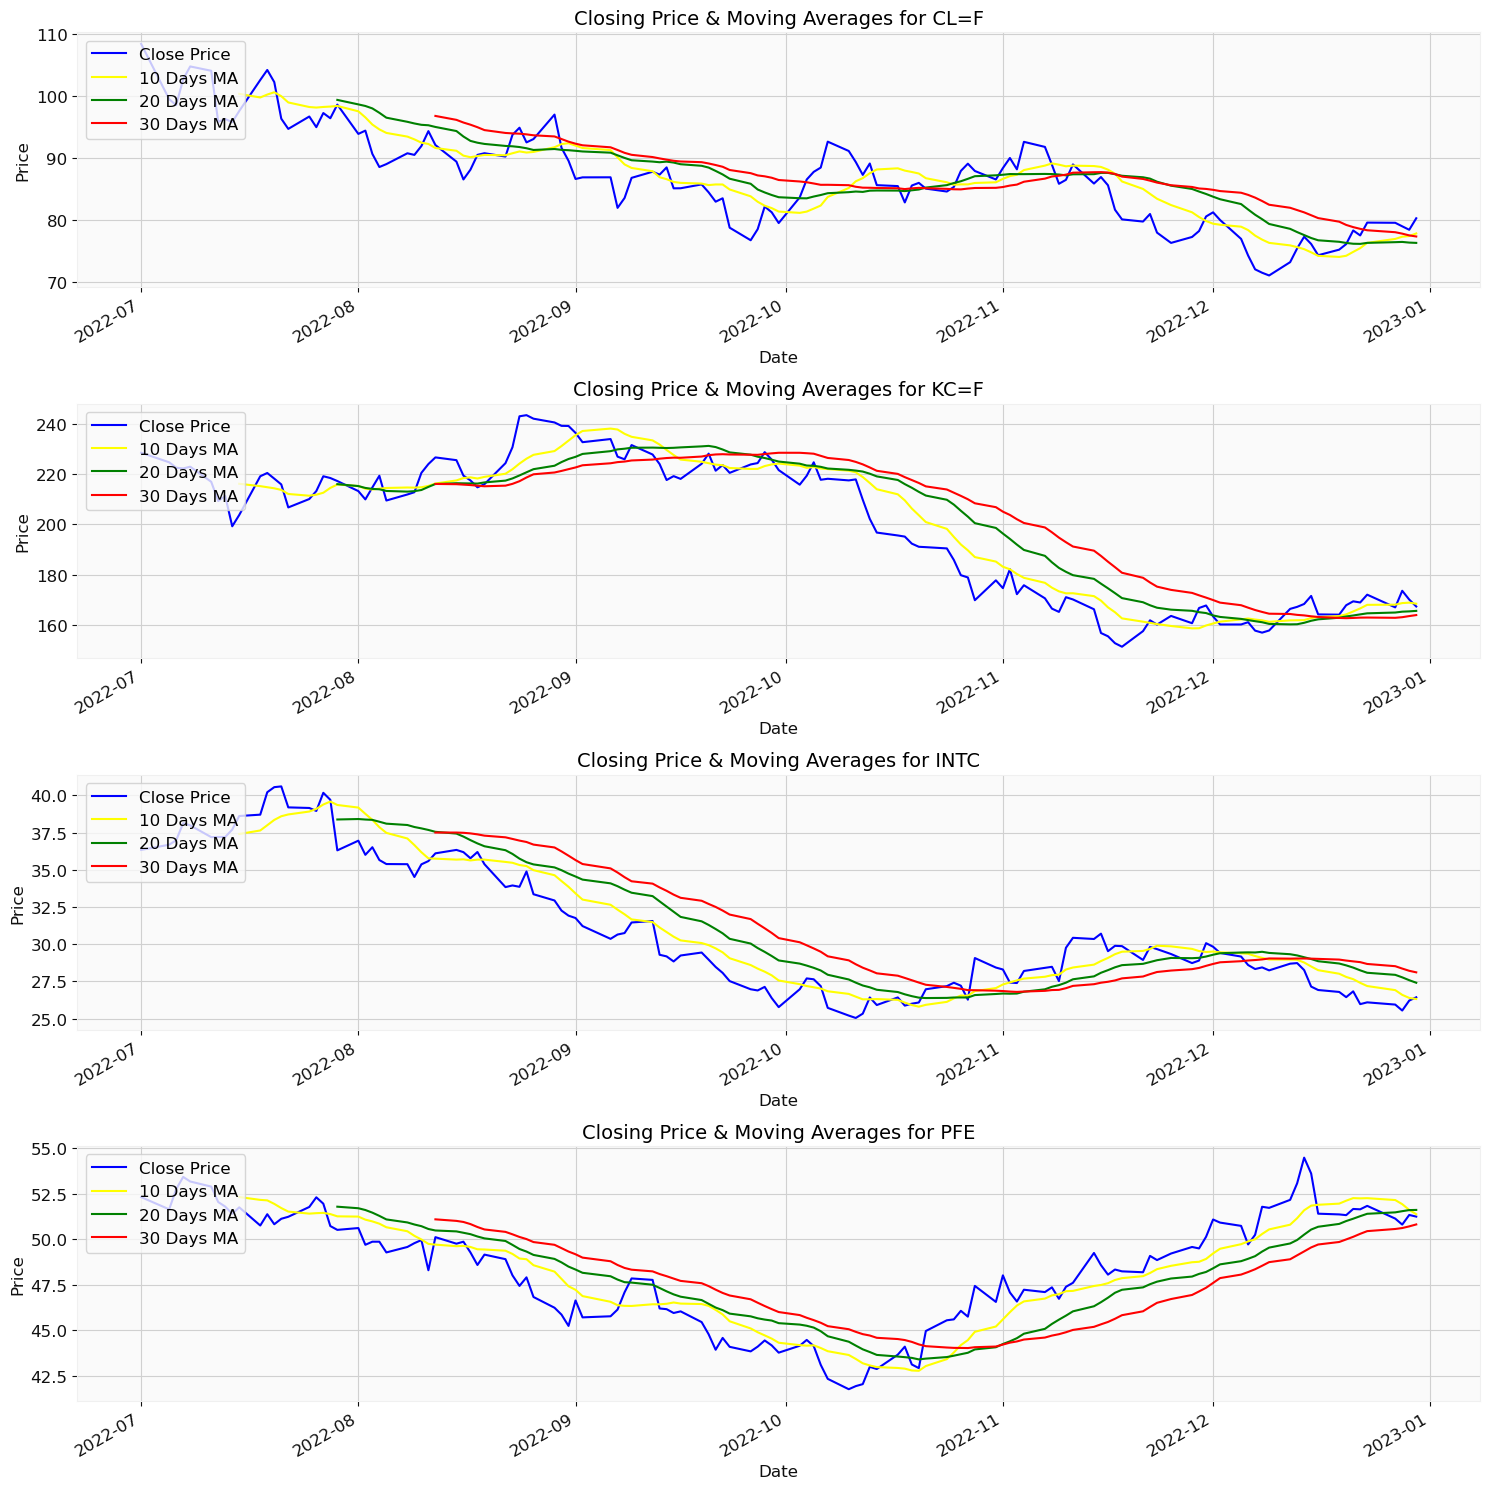

In [57]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(stock_symbols), figsize=(15, 15))
start_date = '2022-07-01'
end_date = '2023-01-01'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

# For each stock, compute the moving averages and plot
for ax, symbol in zip(axes, stock_symbols):
    subset = filtered_df[filtered_df['Symbol'] == symbol]
    
    # Calculate moving averages
    ma10 = subset['Close'].rolling(window=10).mean()
    ma20 = subset['Close'].rolling(window=20).mean()
    ma30 = subset['Close'].rolling(window=30).mean()
    

    subset['Close'].plot(ax=ax, color='blue', label='Close Price')
    ma10.plot(ax=ax, color='yellow', label='10 Days MA') #10 day moving average
    ma20.plot(ax=ax, color='green', label='20 Days MA') #20 day moving average
    ma30.plot(ax=ax, color='red', label='30 Days MA') #30 day moving average
    
    ax.set_title(f"Closing Price & Moving Averages for {symbol}", fontsize=14)
    ax.legend(loc="upper left", fontsize=12)
    ax.set_ylabel("Price", fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.tick_params(axis='both', labelsize=12)  
    ax.grid(True)

plt.tight_layout()
plt.show()


### Daily Returns

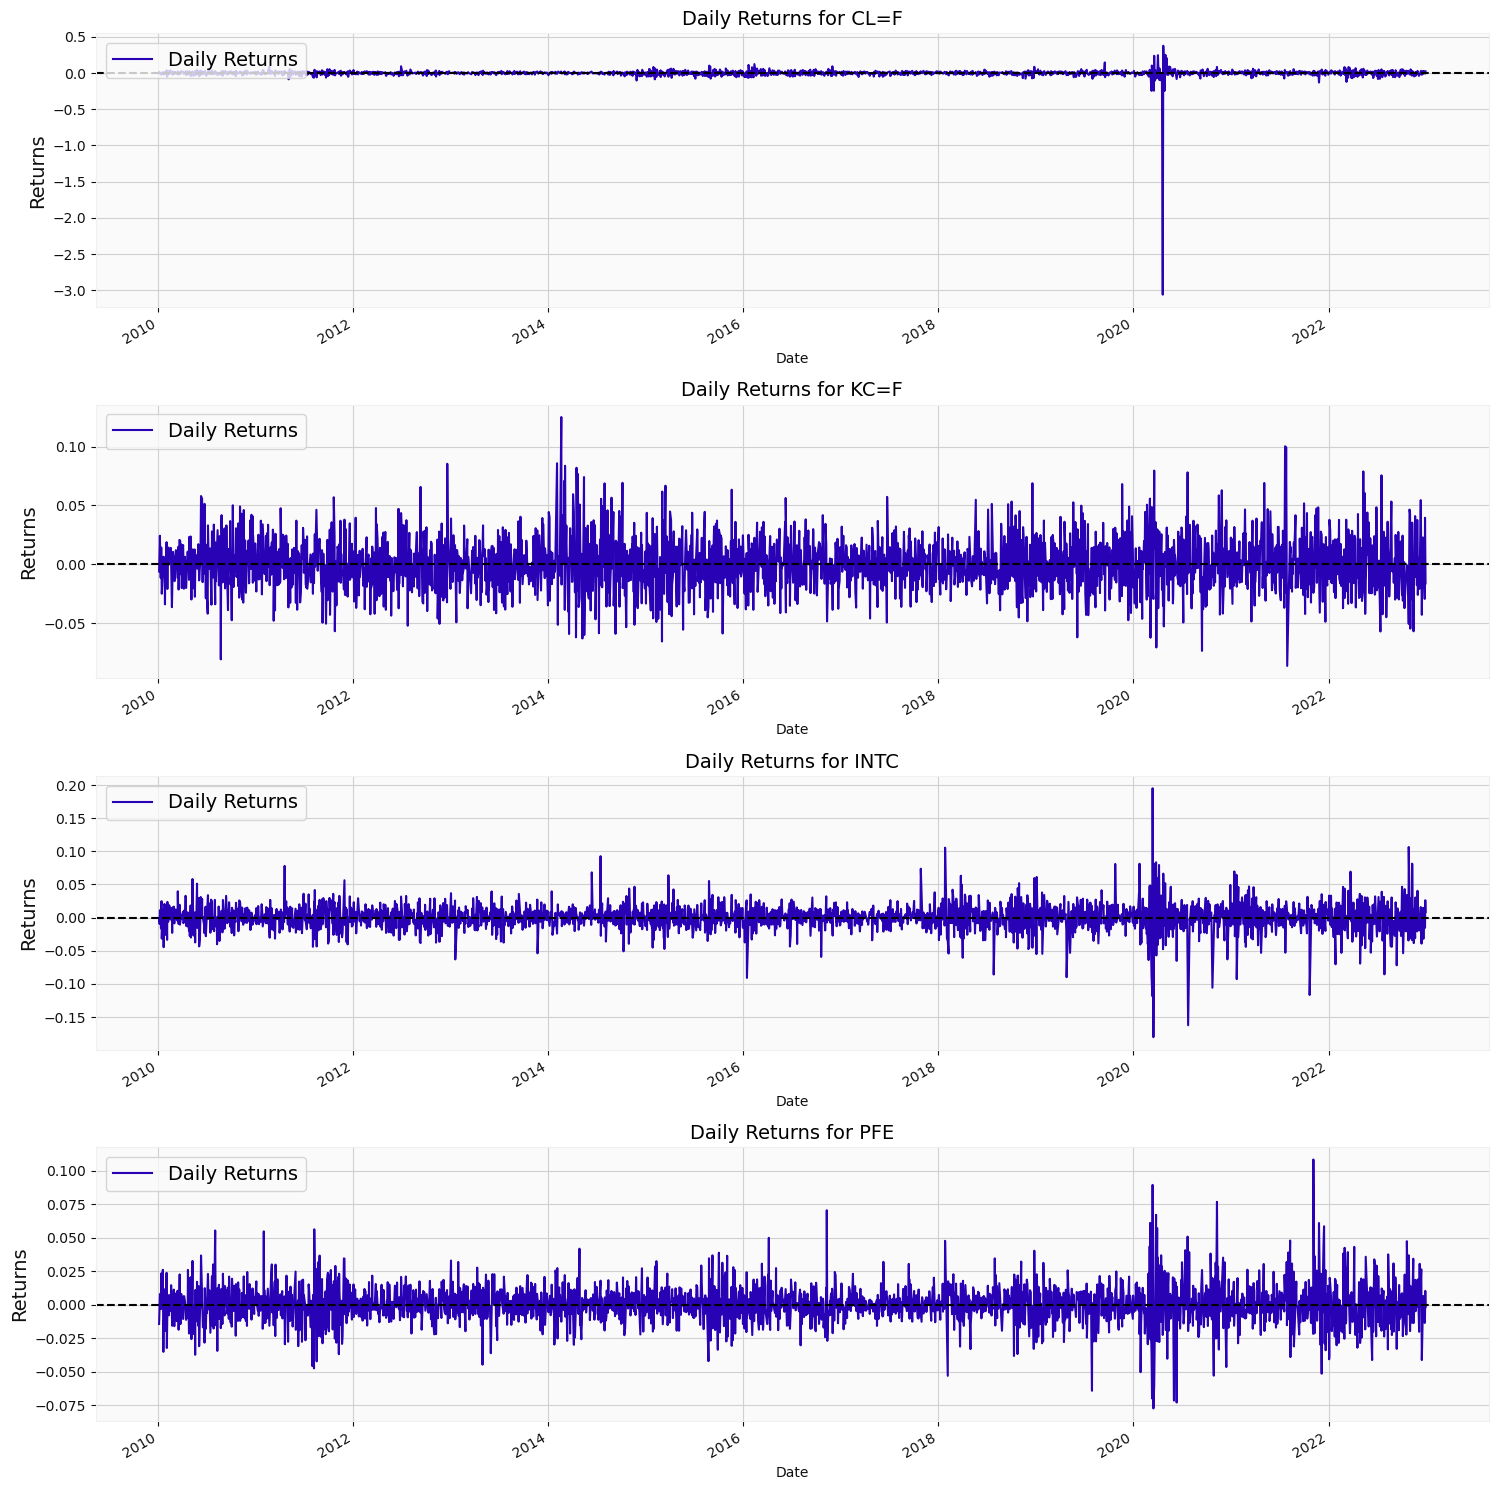

In [58]:
#calculating returns by taking the difference in percentage between previous and current day
df['Returns'] = df.groupby('Symbol')['Close'].pct_change()

fig, axes = plt.subplots(nrows=len(stock_symbols), figsize=(15, 15))

# Plot daily returns for each stock
for ax, symbol in zip(axes, stock_symbols):
    subset = df[df['Symbol'] == symbol]
    subset['Returns'].plot(ax=ax, label='Daily Returns',color='#2902b5')
    
    ax.set_title(f"Daily Returns for {symbol}",fontsize=14)
    ax.legend(loc="upper left",fontsize=14)
    ax.set_ylabel("Returns",fontsize=14)
    ax.grid(True)
    ax.axhline(0, color='black', linestyle='--')  

plt.tight_layout()
plt.show()

### Cumulative Returns

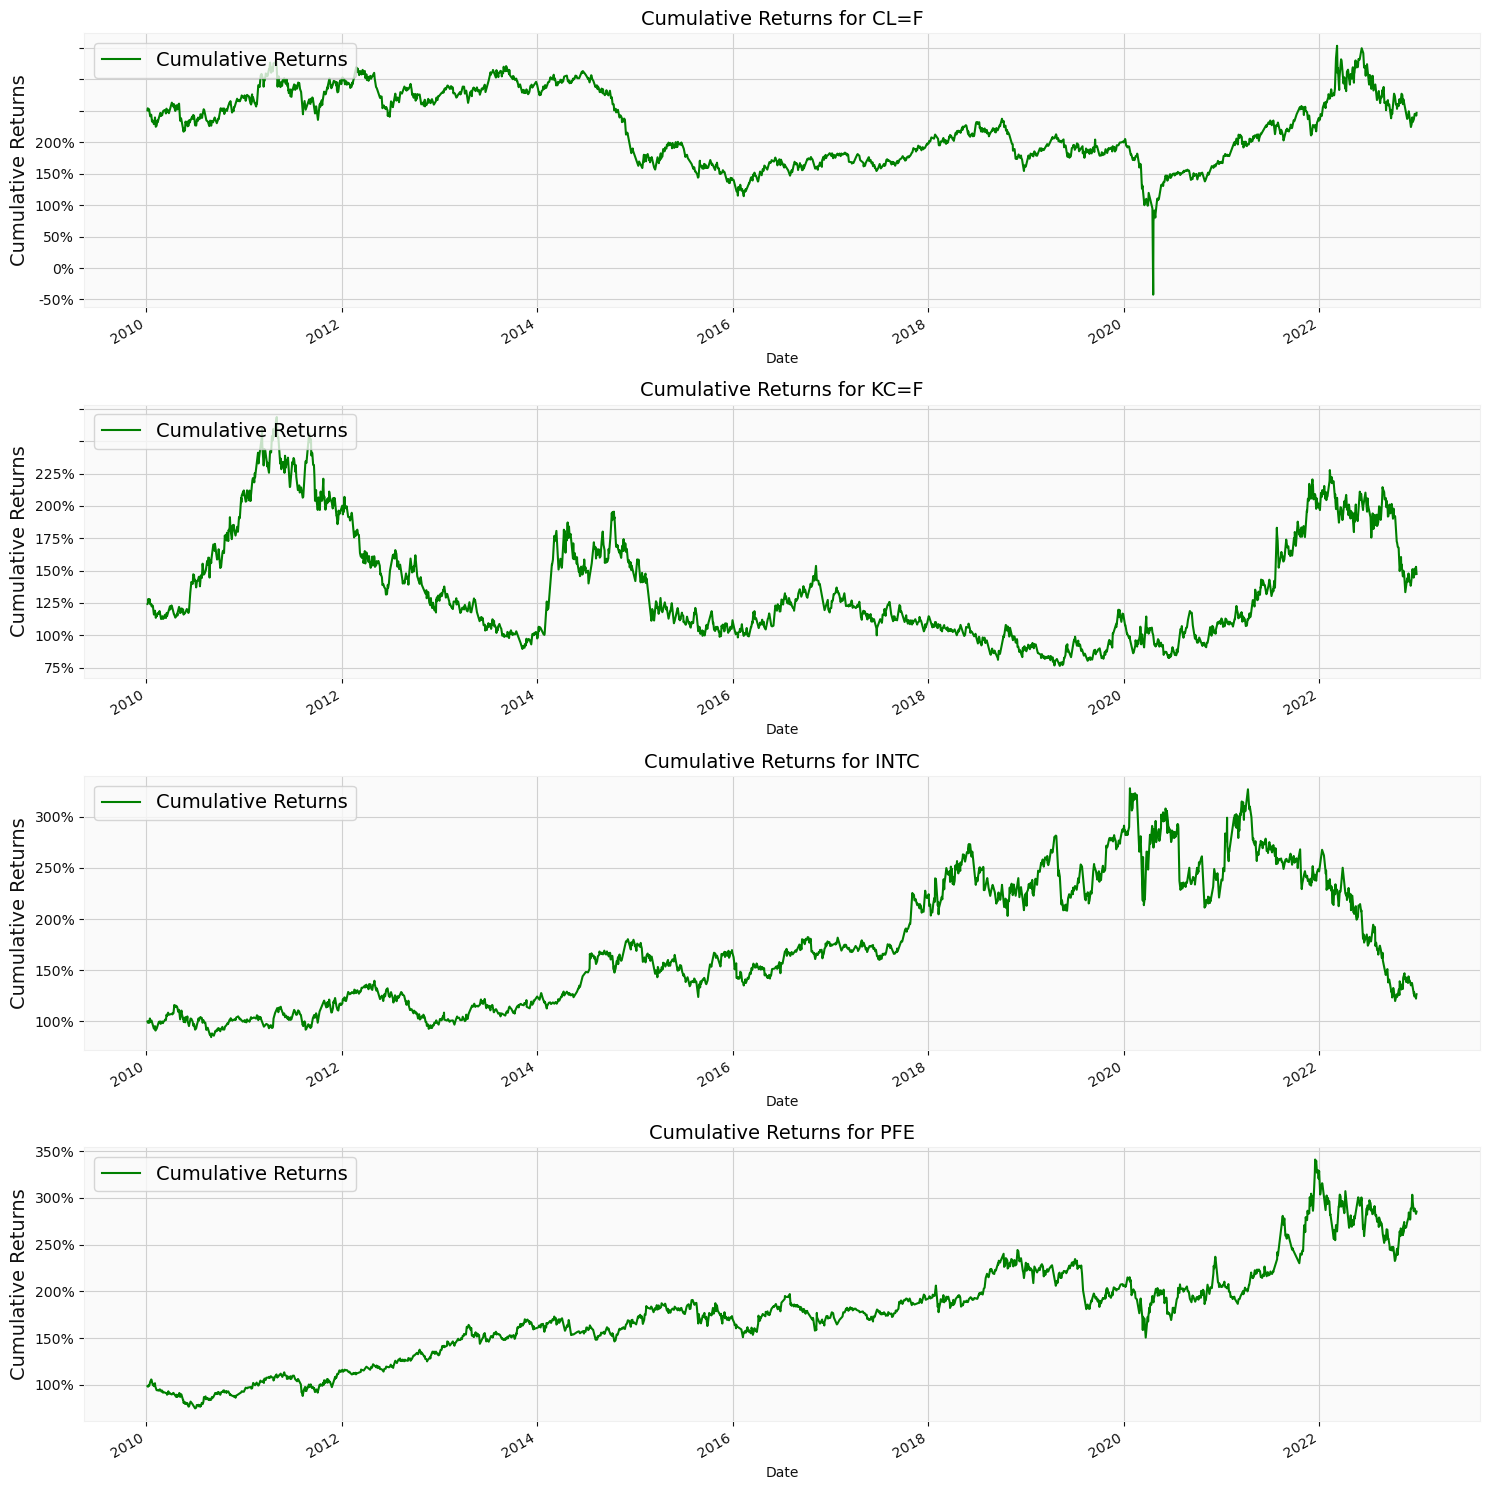

In [61]:
import matplotlib.pyplot as plt
import pandas as pd


df['Returns'] = df.groupby('Symbol')['Close'].pct_change()
df['Cumulative Returns'] = (1 + df['Returns']).groupby(df['Symbol']).cumprod()


fig, axes = plt.subplots(nrows=len(stock_symbols), figsize=(15, 15))

# Plot cumulative returns for each stock
for ax, symbol in zip(axes, stock_symbols):
    subset = df[df['Symbol'] == symbol]
    
    # Plotting the cumulative returns
    subset['Cumulative Returns'].plot(ax=ax, label='Cumulative Returns', color='green')
    
    # Manipulating the y-ticks to display as percentages
    ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()])
    
    ax.set_title(f"Cumulative Returns for {symbol}", fontsize=14)
    ax.legend(loc="upper left", fontsize=14)
    ax.set_ylabel("Cumulative Returns", fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()


### Distribution of Returns

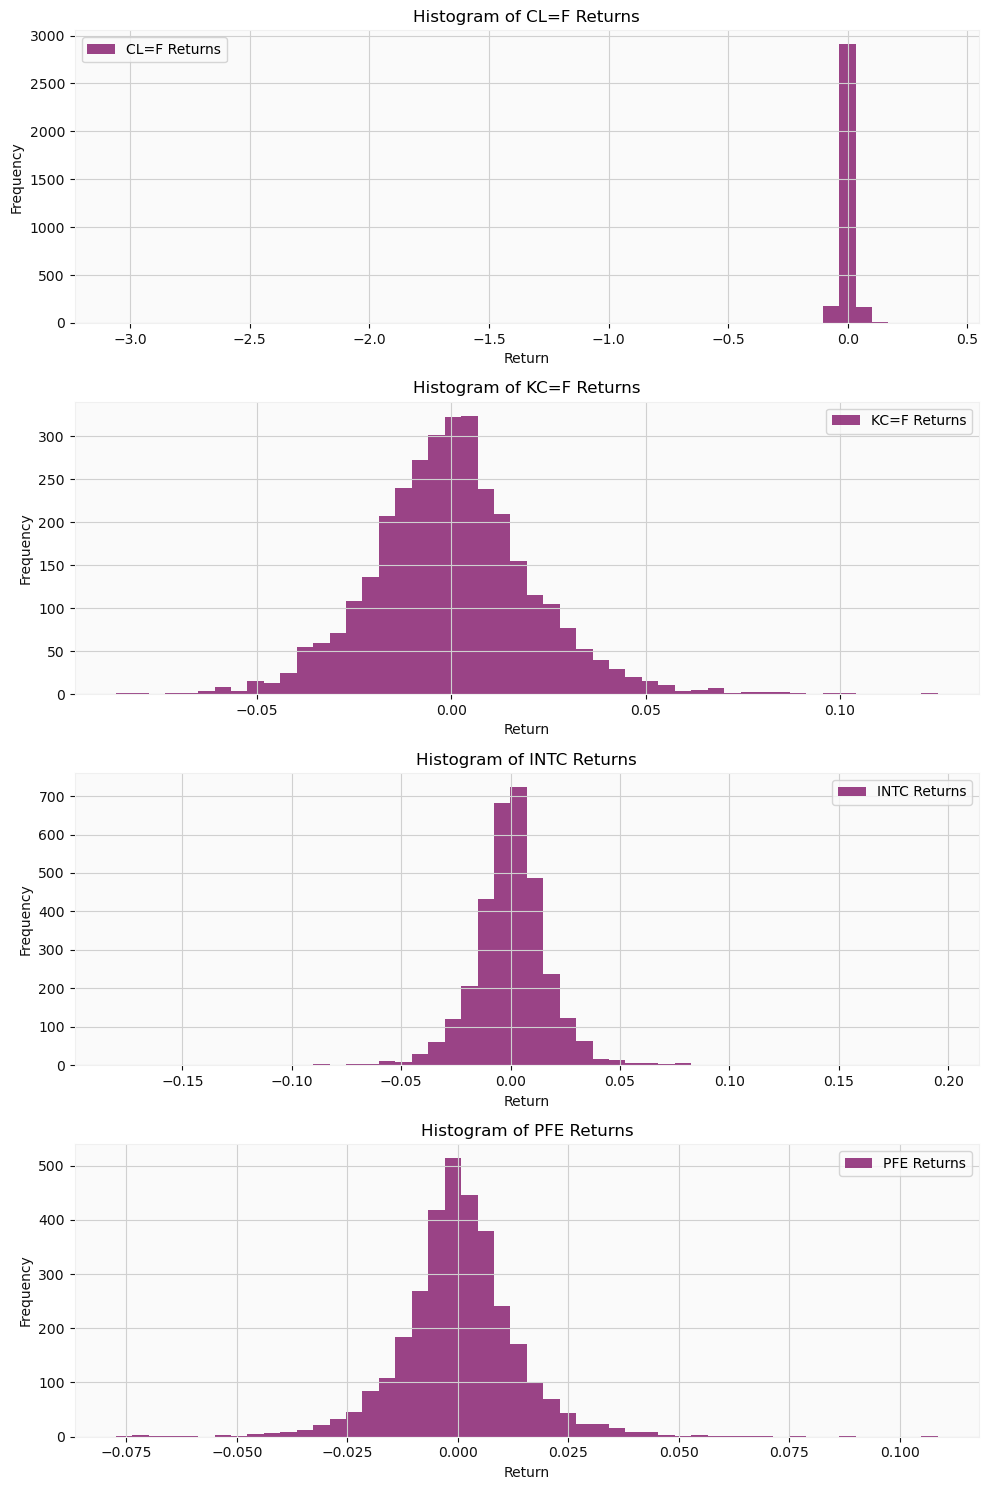

Skewness for CL=F Returns: -36.03
Kurtosis for CL=F Returns: 1663.75

Skewness for KC=F Returns: 0.37
Kurtosis for KC=F Returns: 1.72

Skewness for INTC Returns: -0.16
Kurtosis for INTC Returns: 12.50

Skewness for PFE Returns: 0.28
Kurtosis for PFE Returns: 5.10



In [40]:
from scipy.stats import skew, kurtosis


df['Returns'] = df.groupby('Symbol')['Close'].pct_change()

fig, axes = plt.subplots(nrows=len(stock_symbols), figsize=(10, 15))

# Plot histogram for each stock's returns
for ax, symbol in zip(axes, stock_symbols):
    subset = df[df['Symbol'] == symbol]
    ax.hist(subset['Returns'].dropna(), bins=50, alpha=0.75, color='#7a065f', label=f'{symbol} Returns')
    ax.set_title(f'Histogram of {symbol} Returns')
    ax.set_xlabel('Return')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

for symbol in stock_symbols:
    subset = df[df['Symbol'] == symbol]['Returns'].dropna()
    s = skew(subset)
    k = kurtosis(subset)
    print(f'Skewness for {symbol} Returns: {s:.2f}')
    print(f'Kurtosis for {symbol} Returns: {k:.2f}\n')

### Rolling Volatility 

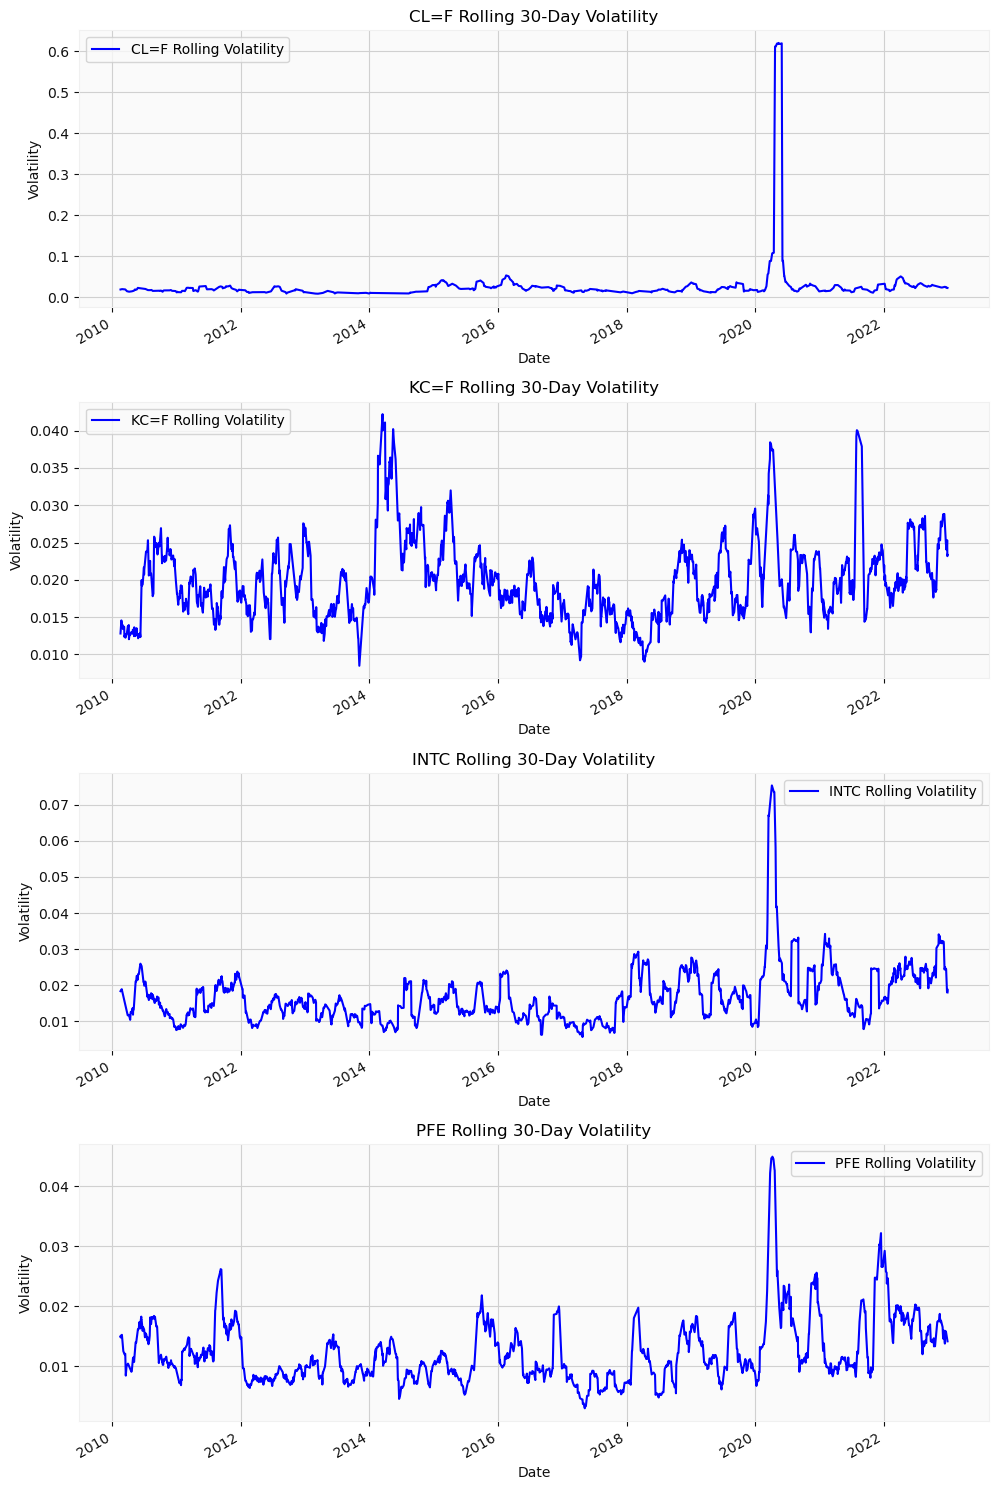

In [64]:
df['Returns'] = df.groupby('Symbol')['Close'].pct_change()

fig, axes = plt.subplots(nrows=len(stock_symbols), figsize=(10, 15))

# Plotting rolling standard deviation for each stock's returns
rolling_window = 30  # 30-day rolling window

for ax, symbol in zip(axes, stock_symbols):
    subset = df[df['Symbol'] == symbol]
    subset['Rolling Volatility'] = subset['Returns'].rolling(window=rolling_window).std() 
    subset['Rolling Volatility'].plot(ax=ax, color='blue', label=f'{symbol} Rolling Volatility')
    ax.set_title(f'{symbol} Rolling {rolling_window}-Day Volatility')
    ax.set_ylabel('Volatility')
    ax.set_xlabel('Date')
    ax.legend()


plt.tight_layout()
plt.show()





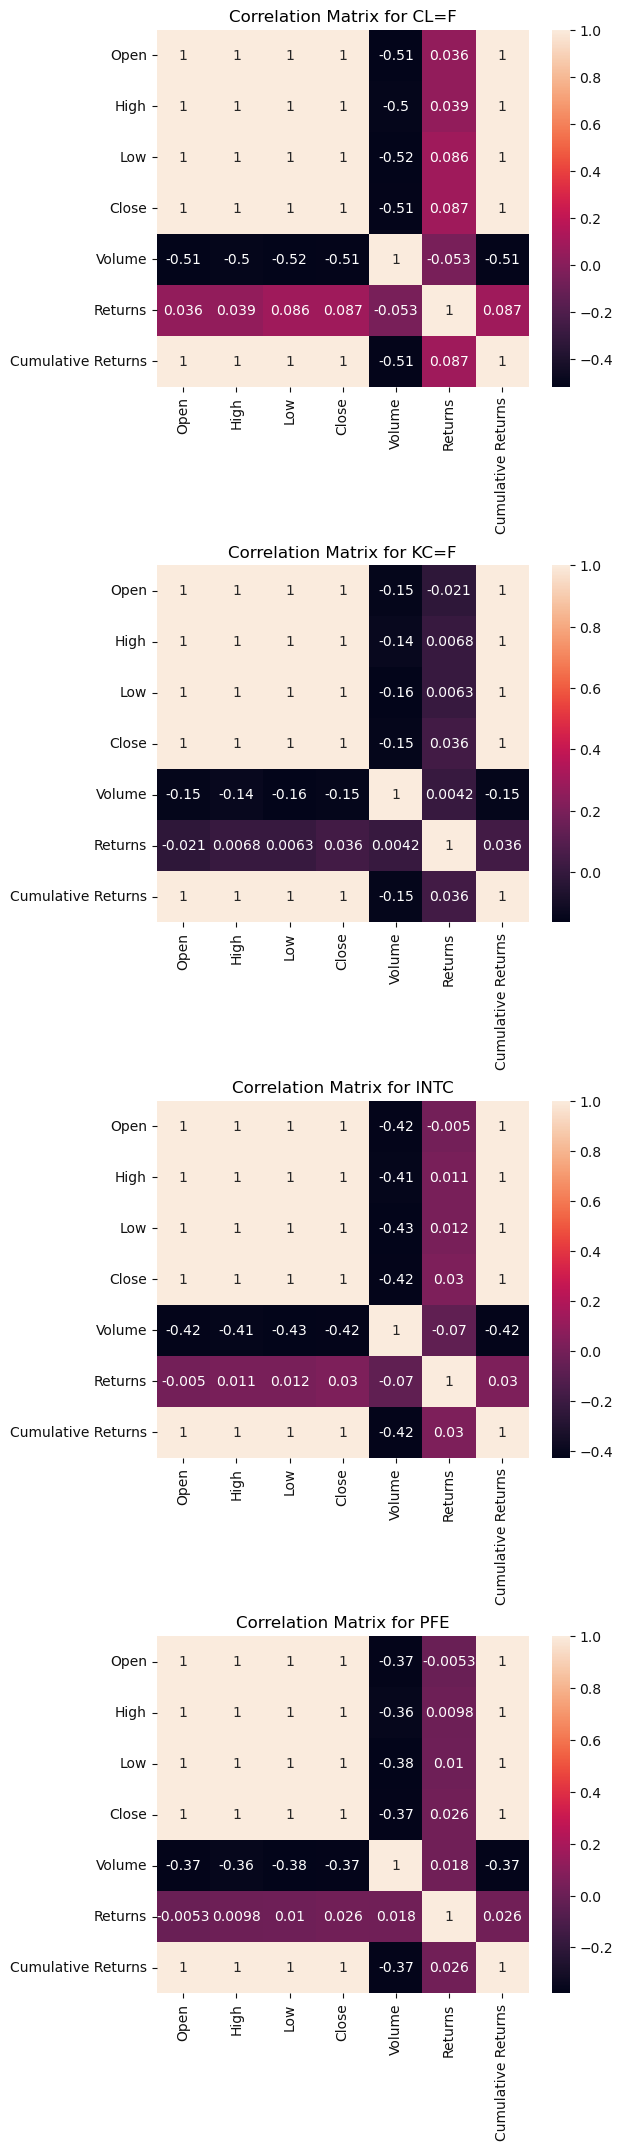

In [43]:
fig_height = 6 * len(stock_symbols) + (len(stock_symbols) - 1) * 0.5

fig, axs = plt.subplots(len(stock_symbols), 1, figsize=(6, fig_height))

# Add vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

for idx, symbol in enumerate(stock_symbols):
    subset = df[df['Symbol'] == symbol]
    corr = subset.corr()
    axs[idx].set_title(f"Correlation Matrix for {symbol}")  # Set title for each subplot
    sns.heatmap(corr, annot=True, ax=axs[idx])  # Use ax parameter to plot on the specific subplot

plt.show()

### Correlation between stocks and commodities 

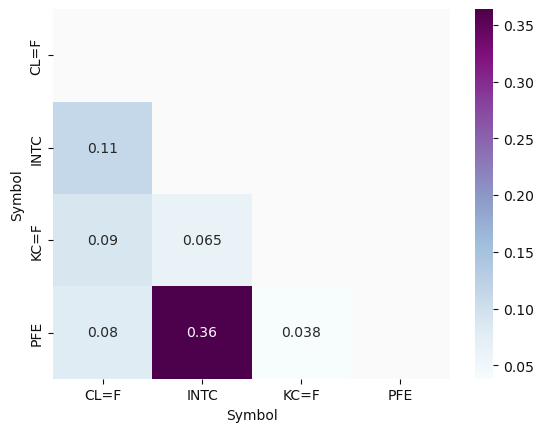

In [44]:


returns_pivot = df.pivot(columns='Symbol', values='Returns')

# Calculate the correlation matrix for the returns
correlation_matrix = returns_pivot.corr()
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, annot=True,mask=mask,cmap='BuPu')
plt.show()


# Feature Engineering

In [45]:
import pandas as pd

stocks = ["CL=F",   # Crude Oil (WTI)
    "BZ=F",   # Crude Oil (Brent)
    "NG=F",   # Natural Gas
    "SI=F",   # Silver
    "HG=F",   # Copper
    "ZC=F",   # Corn (Maize)
    "CT=F",   # Cotton
    "LE=F",   # Cattle
    "KC=F",   # Coffee
    'ABT', 'IBM', 'ORCL', 'INTC','MO','NVS','PFE','TMUS','KO','XOM']
dataframes = {}

def fetch_and_save(stock_symbol):
    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock}.csv", parse_dates=['Date'], index_col='Date')
    
    data['Daily_Return'] = data['Close'].pct_change()
    
    #Adding new features
    # Calculate volatility (30-day rolling standard deviation of daily returns)
    data['Volatility'] = data['Daily_Return'].rolling(window=30).std()
    data['Avg_Close_30'] = data['Close'].rolling(window=30).mean()
    data['Avg_Volume_30'] = data['Volume'].rolling(window=30).mean()
    
    # Add last 30 days of closing prices as features
    for i in range(1, 31):
        data[f'Close_Lag_{i}'] = data['Close'].shift(i)

    # Saving CSV with new feat
    columns_to_save = ['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility','Avg_Close_30','Avg_Volume_30']
    columns_to_save.extend([f'Close_Lag_{i}' for i in range(1, 31)])
    data.dropna(inplace=True)  # Drop rows with NaN values caused by lagging and rolling operations
    data.to_csv(f"C:/Users/kship/Documents/IB/predictions/asset_data/{stock_symbol}_stock_data.csv", columns=columns_to_save)

for stock in stocks:
    fetch_and_save(stock)

    print(stock)
print("Stock data with volatility and lagged close prices has been fetched and saved!")


CL=F
BZ=F
NG=F
SI=F
HG=F
ZC=F
CT=F
LE=F
KC=F
ABT
IBM
ORCL
INTC
MO
NVS
PFE
TMUS
KO
XOM
Stock data with volatility and lagged close prices has been fetched and saved!


### Correaltion matrix with new features

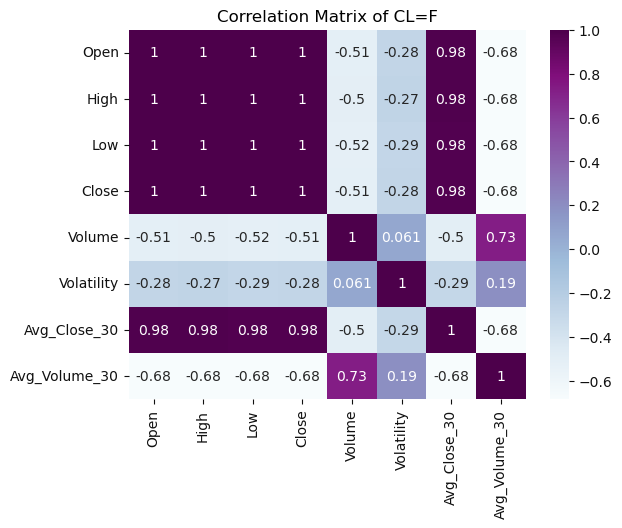

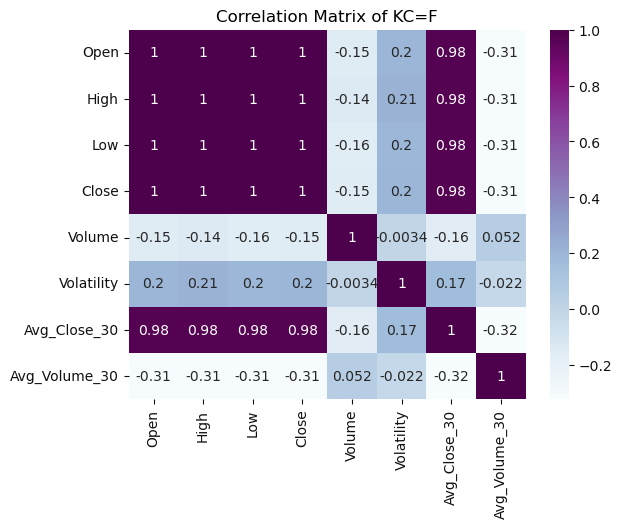

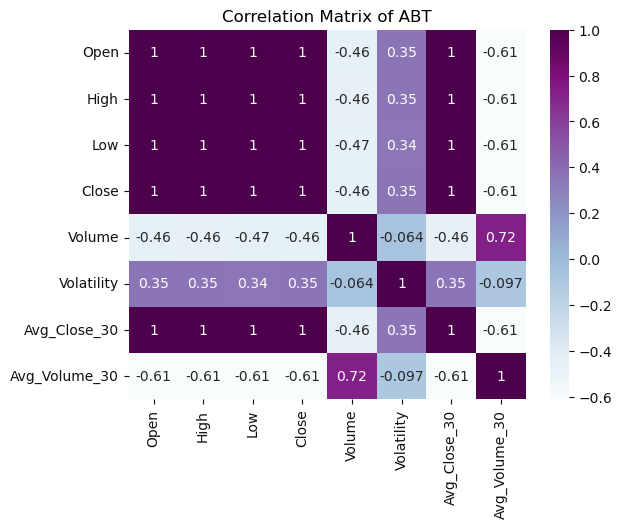

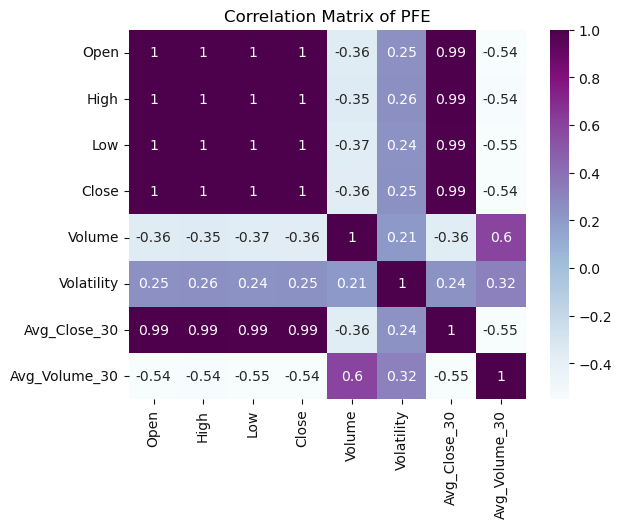

In [65]:
stocks = [
    "CL=F",   
    "KC=F",   
    'ABT',
    'PFE']

for stock in stocks:

    data = pd.read_csv(f"C:/Users/kship/Documents/IB/predictions/data/{stock}_stock_data.csv", parse_dates=['Date'], index_col='Date')
    columns_to_include = ['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility','Avg_Close_30','Avg_Volume_30']
    subset = data[columns_to_include]
    corr_matrix = subset.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
    plt.title(f"Correlation Matrix of {stock}")
    plt.show()